In [24]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

## Hierarchical Clustering on Dataset

**Input:** Given image bounding boxes  
**Output:** Connections between the bounding boxes

---

**Procedure:**

1. Pass the dataset through hierarchical clustering.
2. Pass a `custom_distance` metric to the clustering function and set the linkage to ward.

    ```pseudo
    function custom_distance(bbox1, bbox2):
        # Calculate distance between edge centers of two bounding boxes
        Compute distances between top, left, right, bottom of bbox1 and those of bbox2.
        return minimum of the 16 computed distances
    ```

3. Perform clustering.
   - **Note:** Follow a bottom-to-top progressive approach in the dendrogram.
   
4. Define threshold depending on image type to determine number of levels from bottom.
5. For each cluster in increasing order of levels:
   - Find minimum connecting distance between each pair in the cluster.
   - Maintain a map to improve the connections for matching.

In [25]:
df = pd.read_csv('./problem4-dataset2/CSV/TLBR_68.csv')

In [26]:
df

,Unnamed: 0,Top-Left,Bottom-Right,Id
0,0,"[290, 85]","[435, 147]",0
1,1,"[563, 82]","[730, 147]",1
2,2,"[744, 92]","[940, 140]",2
3,3,"[1163, 92]","[1184, 147]",3
4,4,"[1218, 79]","[1344, 157]",4
...,...,...,...,...
493,493,"[1566, 3264]","[1740, 3315]",493
494,494,"[1762, 3261]","[1851, 3315]",494
495,495,"[1958, 3261]","[2100, 3312]",495
496,496,"[2120, 3250]","[2163, 3315]",496


In [27]:
np_arr = np.array(df)

In [28]:
top_edge=[]
bottom_edge=[]
right_edge=[]
left_edge=[]

for bbox in np_arr:
    cluster1 = bbox
    tlr = int((cluster1[1].split(',')[0]).split('[')[-1])
    tlc= int((cluster1[1].split(',')[1]).split(']')[-2])

    brr = int((cluster1[2].split(',')[0]).split('[')[-1])
    brc= int((cluster1[2].split(',')[1]).split(']')[-2])

    top_edgec = (tlr,(tlc+brc)/2)
    bottom_edgec = (brr,(tlc+brc)/2)
    left_edgec = ((tlr+brr)/2,tlc)
    right_edgec = ((tlr+brr)/2,brc)
    
    top_edge.append(top_edgec)
    right_edge.append(right_edgec)
    bottom_edge.append(bottom_edgec)
    left_edge.append(left_edgec)

In [29]:
data_points_fc = np_arr

In [30]:
def custom_distance(cluster1, cluster2):
    
    cluster1_array = []
    tlr = int((cluster1[1].split(',')[0]).split('[')[-1])
    tlc= int((cluster1[1].split(',')[1]).split(']')[-2])

    brr = int((cluster1[2].split(',')[0]).split('[')[-1])
    brc= int((cluster1[2].split(',')[1]).split(']')[-2])

    top_edgec = (tlr,(tlc+brc)/2)
    bottom_edgec = (brr,(tlc+brc)/2)
    left_edgec = ((tlr+brr)/2,tlc)
    right_edgec = ((tlr+brr)/2,brc)
    
    cluster1_array.append(top_edgec)
    cluster1_array.append(right_edgec)
    cluster1_array.append(bottom_edgec)
    cluster1_array.append(left_edgec)
    
    cluster2_array = []
    tlr = int((cluster2[1].split(',')[0]).split('[')[-1])
    tlc= int((cluster2[1].split(',')[1]).split(']')[-2])

    brr = int((cluster2[2].split(',')[0]).split('[')[-1])
    brc= int((cluster2[2].split(',')[1]).split(']')[-2])

    top_edgec = (tlr,(tlc+brc)/2)
    bottom_edgec = (brr,(tlc+brc)/2)
    left_edgec = ((tlr+brr)/2,tlc)
    right_edgec = ((tlr+brr)/2,brc)
    
    cluster2_array.append(top_edgec)
    cluster2_array.append(right_edgec)
    cluster2_array.append(bottom_edgec)
    cluster2_array.append(left_edgec)
    
    min_dist = 1e9
    for i in cluster1_array:
        for j in cluster2_array:
            min_dist = min(min_dist,((i[0]-j[0])**2 + (i[1]-j[1])**2)**(1/2))
    return min_dist

In [31]:
from scipy.spatial.distance import pdist, squareform

data_points_fc = np.array(data_points_fc)
print(data_points_fc.shape)

distance_matrix = pdist(np_arr, metric=custom_distance)

(498, 4)


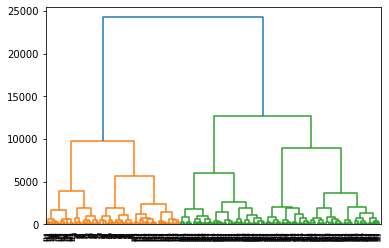

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Use the linkage function with the 'precomputed' method since we already computed our distances
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
dendrogram(Z)
plt.show()

In [33]:
np.max(Z[:,0])

992.0

In [34]:
print(Z.shape)

(497, 4)


In [35]:
combined_list = [list(item) for item in zip(top_edge, right_edge, bottom_edge, left_edge)]

In [43]:
# chatgpt
def get_levelwise_clusters(linkage_matrix):
    n = linkage_matrix.shape[0] + 1
    clusters = {i: [i] for i in range(n)}
    
    all_clusters = []
    for i in range(n):
        all_clusters.append([i])
    
    for i, (a, b, _, _) in enumerate(linkage_matrix.astype(int)):
        merged = clusters[a] + clusters[b]
        clusters[n + i] = merged
        
        # Remove old clusters
        del clusters[a]
        del clusters[b]
        
        all_clusters.append(merged)
        
    return all_clusters

In [37]:
levelwise_clusters = get_levelwise_clusters(Z)

In [38]:
print(levelwise_clusters)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [15

<h2>Algorithm</h2>

In [39]:
clusters = levelwise_clusters
mp_pts = {}

# edge->(edge,dist)
mp_edge_dist={}
max_uproot = 3

# Let's print the clusters:
ctr=0
ctr_all = 0
mukhya=0
for num, cluster in enumerate(clusters):
    flag=0
    for idx in cluster:
        
        try:
            if(mp_pts[idx]>=max_uproot):
                flag=1
                break
            else:
                mp_pts[idx]+=1
        except:
            mp_pts[idx]=1
            
    if(flag==0):
        if len(cluster)==2:
            mukhya+=1
            
        for i in cluster:
            for j in cluster:
                if(j!=i):
                    min_dist=1e9
                    flagger=0
                    for op1 in range(4):
                        for op2 in range(4):
                            
                            if(((combined_list[i][op1][0]-combined_list[j][op2][0])**2 + (combined_list[i][op1][1]-combined_list[j][op2][1])**2)**(1/2) < min_dist):
                                min_dist = ((combined_list[i][op1][0]-combined_list[j][op2][0])**2 + (combined_list[i][op1][1]-combined_list[j][op2][1])**2)**(1/2)
                                best_params = (idx,min_dist,op1,op2)
                                flagger=1
                    try:
                        if(flagger==1 and mp_edge_dist[str(i)+"---"+str(best_params[2])][2]>best_params[1]):
                            dusra = mp_edge_dist[str(i)+"---"+str(best_params[2])][0]
                            dusraop = mp_edge_dist[str(i)+"---"+str(best_params[2])][1]
                            
                            del mp_edge_dist[str(dusra)+"---"+str(dusraop)]
                            
                            mp_edge_dist[str(i)+"---"+str(best_params[2])] = (j,best_params[3],best_params[1])
                            mp_edge_dist[str(j)+"---"+str(best_params[3])] = (i,best_params[2],best_params[1])
                            
                            
                            ctr+=1
                            
                    except:
                        mp_edge_dist[str(i)+"---"+str(best_params[2])] = (j,best_params[3],best_params[1])
                        mp_edge_dist[str(j)+"---"+str(best_params[3])] = (i,best_params[2],best_params[1])
    
print(mukhya)

220


In [40]:
print(ctr)
print(len(mp_edge_dist.keys()))

91
778


In [41]:
def visualize_bboxes(img,mp_edge_dist,combined_list):
  img_2 = img.copy()

  for key,value in mp_edge_dist.items():
        idx1,or1 = map(int,key.split("---"))
        idx2,or2 = value[0],value[1]
        x1 = int(combined_list[idx1][or1][0])
        y1 = int(combined_list[idx1][or1][1])
        
        x2 = int(combined_list[idx2][or2][0])
        y2 = int(combined_list[idx2][or2][1])
        
#         print(x1,y1,x2,y2)
        line_thickness = 10
        cv2.line(img_2, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
        
  for index, rows in df.iterrows():
        top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
        bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
        cv2.rectangle(img_2, top_left, bottom_right, (0, 0, 255), 2)
    
  fig,axs = plt.subplots(1,1,figsize=(40,70))
  axs.imshow(img_2)
  plt.axis('off')
  plt.savefig('./sample.png')


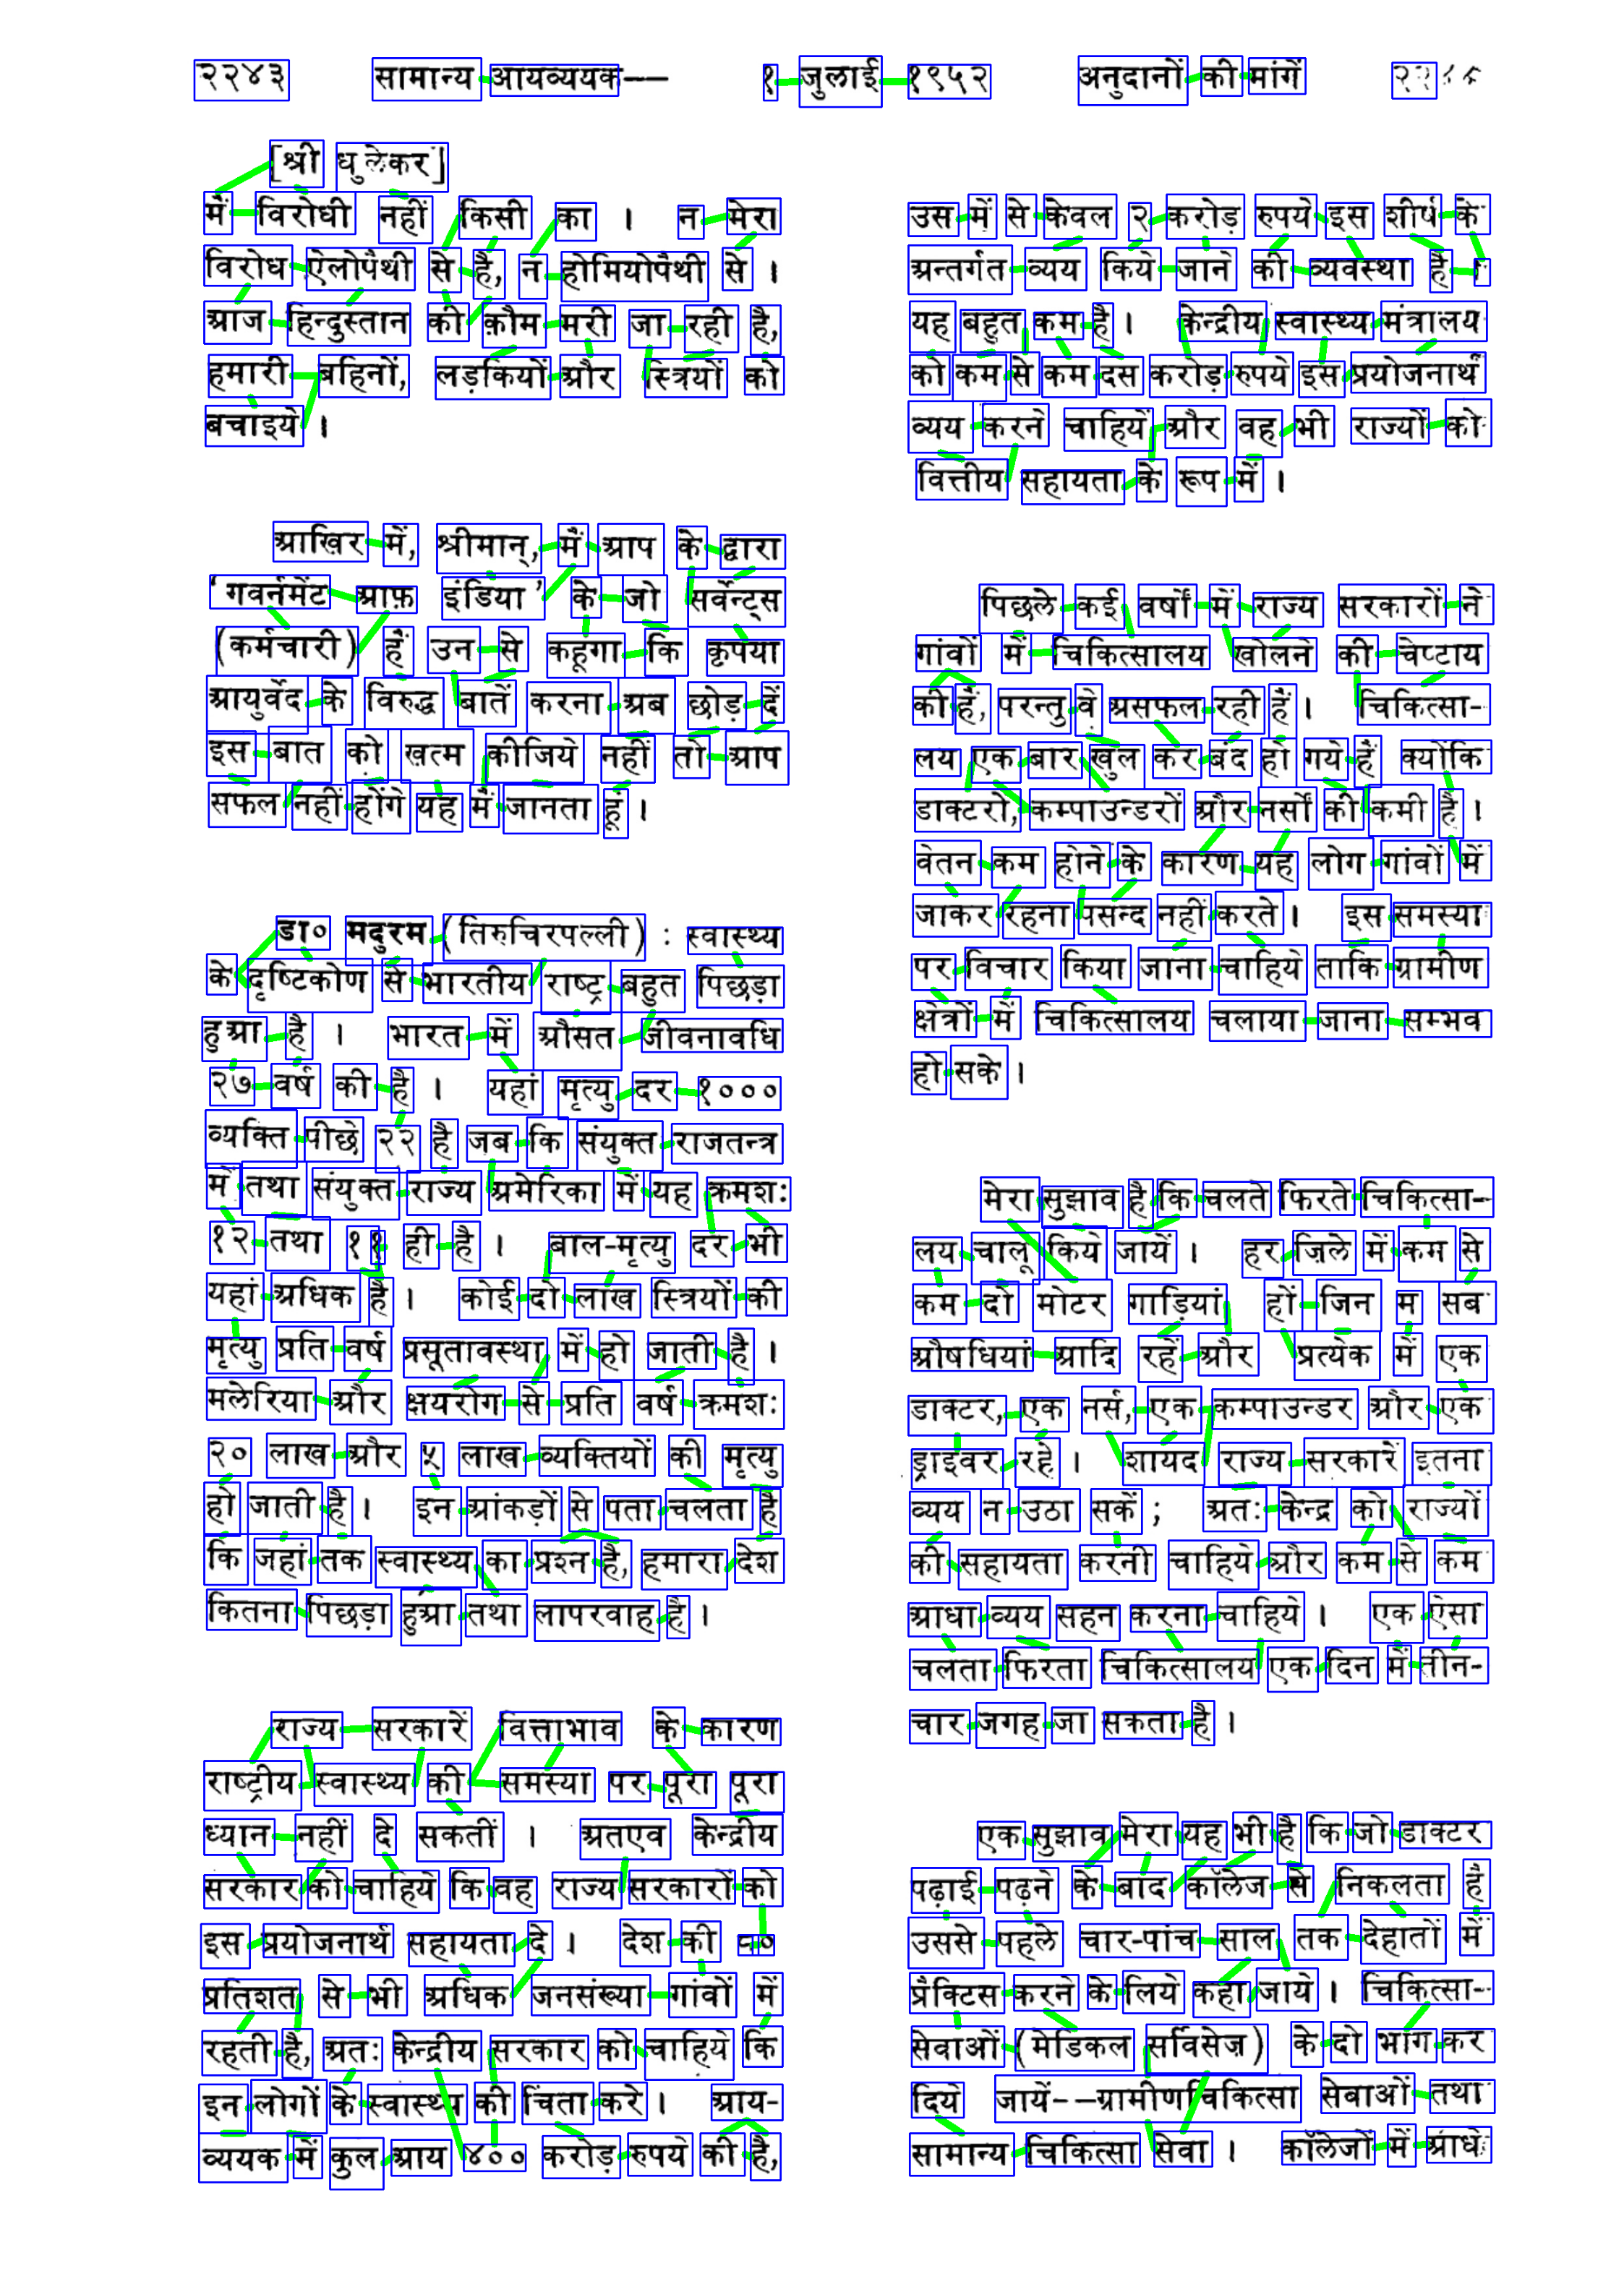

In [42]:
image = cv2.imread('./problem4-dataset2/images/68.jpg')
visualize_bboxes(image,mp_edge_dist,combined_list)